# 02806 Final Project
## Data From The Frontlines: Unveiling the dynamics of conflicts in Ukraine and the Black Sea region

### Group 64:
- **Lukas Rasocha** (s233498)
- **NAME** (s174398)
- **NAME** (s174394)

<center><img src="./assets/blacksearegion.jpeg" alt="drawing" width="850"/></center>

## 1. Motivation.
- What is your dataset?

This dataset contains all political violence events, demonstration events, and strategic developments recorded in Ukraine and the Black Sea from the beginning of ACLED coverage in 2018 to the present.



- Why did you choose this/these particular dataset(s)?

We chose this dataset to explore how wars or conflicts affect regions. The dataset (Ukraine & the Black Sea ( 26 April 2024 )) holds important details such as region specifics, fatalities, population data, and event specifics related to conflicts. By analyzing these factors together, we aim to understand how conflicts impact the regions where they occur. 

- What was your goal for the end user's experience?

The dataset included numerous attributes with values spanning from 2018 to the present. With such extensive resources, we had more than enough material to craft a compelling story. 

Our main goal was to explore the relationships between these variables and create a narrative about how conflicts affect regions. There were lots of things happening in the region. Our goal was to share as many insights as we could with the user.

Through visuals, we wanted to show what's happening in different regions and how conflicts are causing changes. We aimed to understand how these factors are interconnected and illustrate the impact of conflicts. 



## 2. Basic stats. Let's understand the dataset better
- Write about your choices in data cleaning and preprocessing

- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

## 3. Data Analysis
- Describe your data analysis and explain what you've learned about the dataset.

- If relevant, talk about your machine-learning.

## 4. Genre. Which genre of data story did you use?
- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
For our presentation, we opted for a magazine-style genre to present our data story effectively. To enhance the narrative with visual narrative, we explored various formats, ultimately finding the Progress bar/Time bar to be most suitable for visual structuring.

In our plots, we integrated zooming functionality to allow for detailed views of specific regions. This improvement allows viewers to examine the data closely, regardless of its scale or level of detail. Animated transition is also used to show the change over time. As there was some data related to years, the animated transition was very much effective in showing change over time.

- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## 6. Discussion. Think critically about your creation
- What went well?

- What is still missing? What could be improved?, Why?

## 7. Contributions. Who did what?
- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

- It is not OK simply to write "All group members contributed equally".

## Libraries

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nx_altair as nxa
import networkx as nx


import json
import altair as alt
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

## Load data

In [379]:
data = pd.read_csv("data.csv", delimiter=';')
data.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,POPULATION_1KM,POPULATION_2KM,POPULATION_5KM,POPULATION_BEST
0,ROU2045,16-January-2023,2023,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Adevarul; News.ro,National,"Defusal: On 16 January 2023, Romanian Naval Fo...",0,NaN,1687286172,NaN,NaN,9.0,NaN
1,ROU2026,10-December-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Agerpres; Deschide,National-Regional,"Defusal: On 10 December 2022, the Romanian nav...",0,NaN,1687286172,NaN,NaN,NaN,NaN
2,ROU1961,08-September-2022,2022,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Military Forces,NaN,8,...,Adevarul; Balkan Insight; Digi24; G4media; RFE/RL,National-Regional,"On 8 September 2022, a sea mine of unknown ori...",0,NaN,1687286172,NaN,NaN,NaN,NaN
3,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882,NaN,NaN,NaN,NaN
4,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-2023),NaN,1,...,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1687286172,NaN,NaN,NaN,NaN


In [220]:
data.columns

Index(['EVENT_ID_CNTY', 'EVENT_DATE', 'YEAR', 'TIME_PRECISION',
       'DISORDER_TYPE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'CIVILIAN_TARGETING', 'ISO', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TAGS', 'TIMESTAMP', 'POPULATION_1KM', 'POPULATION_2KM',
       'POPULATION_5KM', 'POPULATION_BEST'],
      dtype='object')

In [221]:
data.shape

(151159, 35)

In [222]:
# Plot fatalaties by month and year as a line plot
# EVENT_DATE is for example 04-July-2022
data['EVENT_DATE'] = pd.to_datetime(data['EVENT_DATE'])

data['month'] = data['EVENT_DATE'].dt.month
data['year'] = data['EVENT_DATE'].dt.year

In [223]:
date_min = data['EVENT_DATE'].min()
date_max = data['EVENT_DATE'].max()
print(date_min, date_max)

2018-01-01 00:00:00 2024-03-08 00:00:00


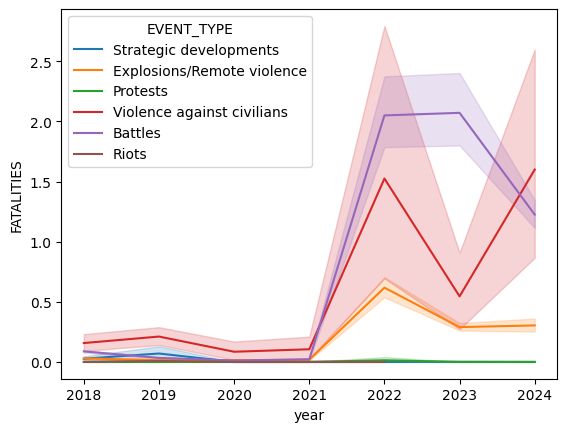

In [224]:
# Plot EVENT_TYPE as hue to see if there is a pattern
sns.lineplot(data=data, x='year', y='FATALITIES', hue='EVENT_TYPE')
plt.show()


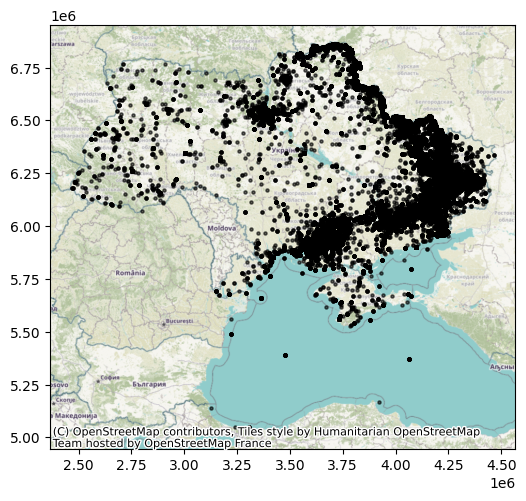

In [225]:
# Plot all latitude and longitude points on a map
import geopandas as gpd
from shapely.geometry import Point

# Replace comma with dot in LATITUDE and LONGITUDE
data['LATITUDE'] = data['LATITUDE'].str.replace(',', '.')
data['LONGITUDE'] = data['LONGITUDE'].str.replace(',', '.')
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))




import contextily as ctx
import matplotlib.pyplot as plt

# Define the coordinate system to WGS84 (used by GPS)
gdf.crs = "EPSG:4326"

# Convert to Web Mercator for contextily
gdf_web_mercator = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
gdf_web_mercator.plot(ax=ax, color='black', markersize=5, alpha=0.6)

# Add a basemap
ctx.add_basemap(ax)

plt.show()

In [226]:
# Number of nan values in each column
data.isna().sum()


EVENT_ID_CNTY              0
EVENT_DATE                 0
YEAR                       0
TIME_PRECISION             0
DISORDER_TYPE              0
EVENT_TYPE                 0
SUB_EVENT_TYPE             0
ACTOR1                     0
ASSOC_ACTOR_1         139480
INTER1                     0
ACTOR2                 70227
ASSOC_ACTOR_2         134245
INTER2                     0
INTERACTION                0
CIVILIAN_TARGETING    144133
ISO                        0
REGION                     0
COUNTRY                    0
ADMIN1                    38
ADMIN2                   149
ADMIN3                  2697
LOCATION                   0
LATITUDE                   0
LONGITUDE                  0
GEO_PRECISION              0
SOURCE                     0
SOURCE_SCALE               0
NOTES                      0
FATALITIES                 0
TAGS                  144594
TIMESTAMP                  0
POPULATION_1KM         31923
POPULATION_2KM         31895
POPULATION_5KM         32077
POPULATION_BES

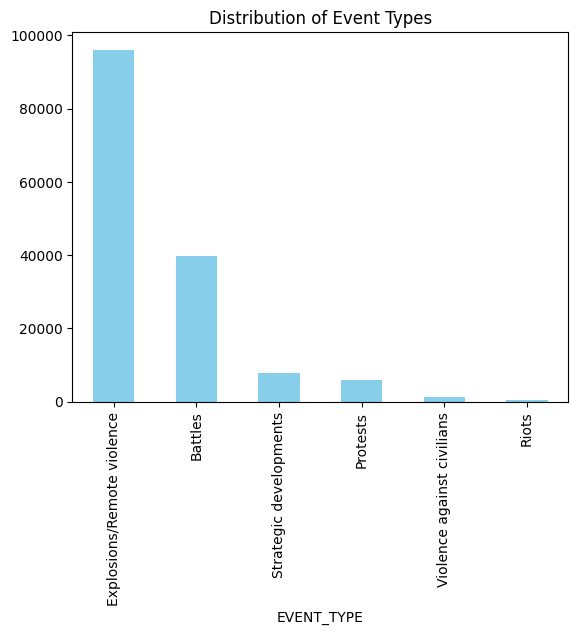

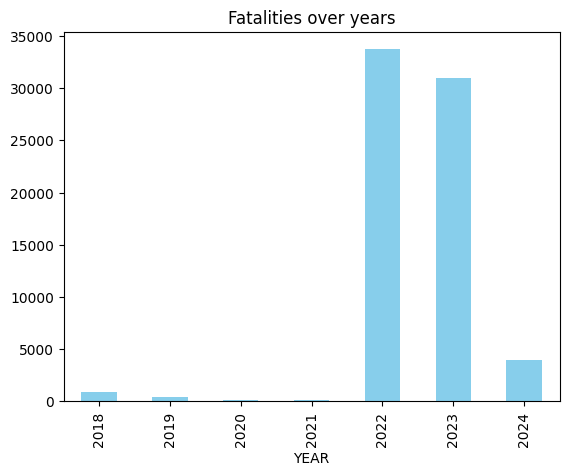

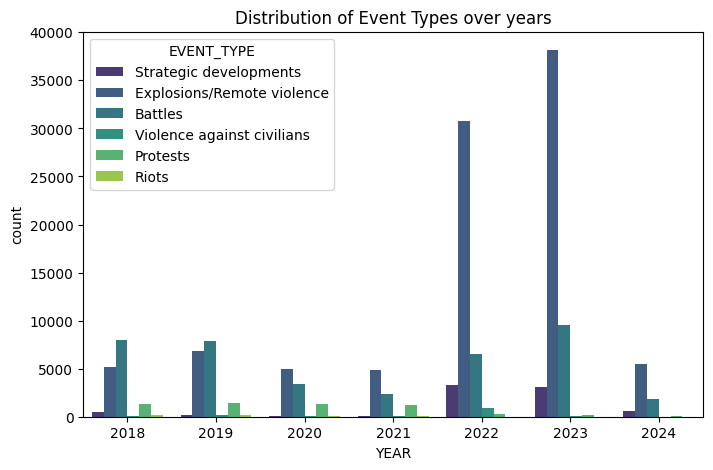

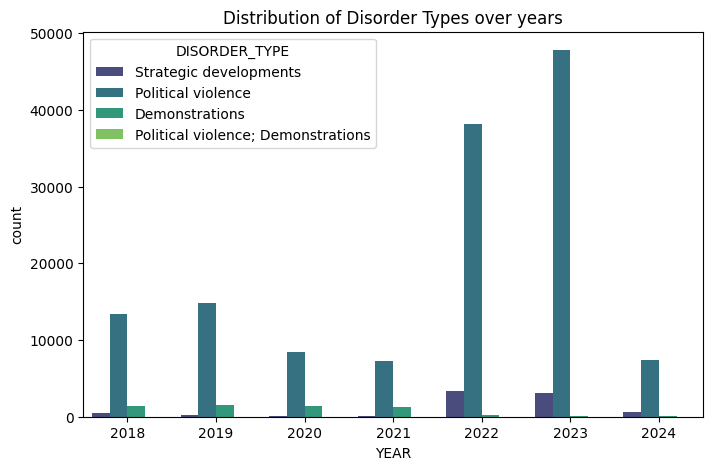

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_22665/1935169550.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='ACTOR1', palette='viridis', order=data['ACTOR1'].value_counts().index[:10])


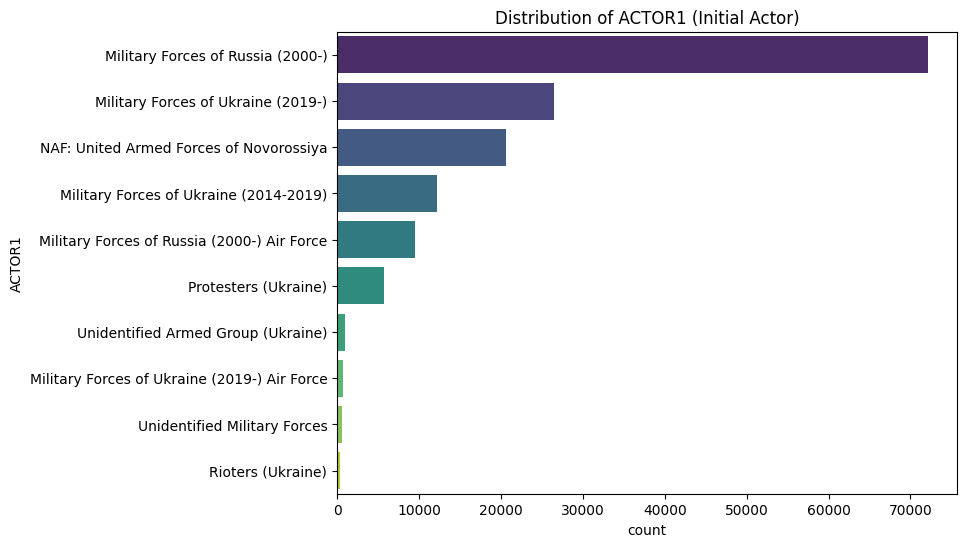

/var/folders/1g/nb69w5095276sxhrps7sndf80000gn/T/ipykernel_22665/1935169550.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='SUB_EVENT_TYPE', palette='viridis', order=data['SUB_EVENT_TYPE'].value_counts().index[:10])


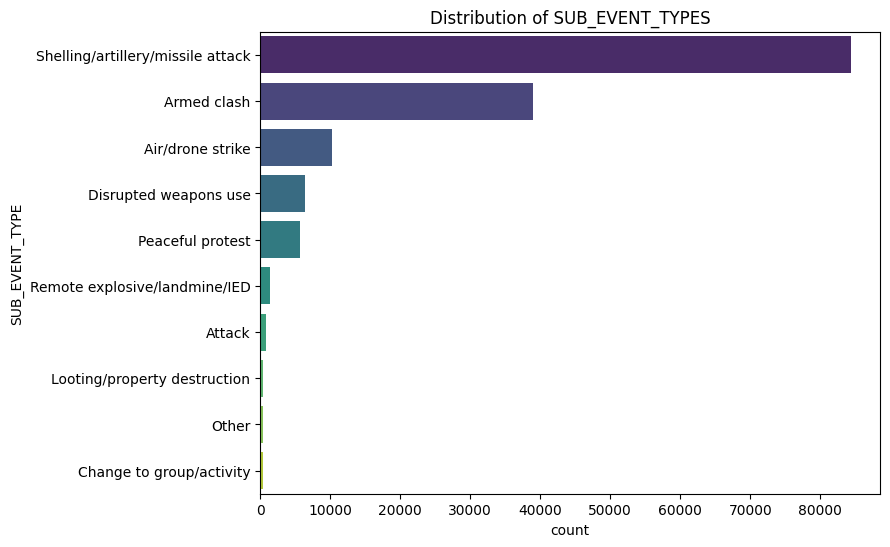

In [227]:
# Show the distribution of Event Types
data['EVENT_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Event Types")
plt.show()

# Show the distribution of Fatalities over years
data.groupby('YEAR')['FATALITIES'].sum().plot(kind='bar', color='skyblue')
plt.title("Fatalities over years")
plt.show()

# Show the distribution of each individual event type over years
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=data, x='YEAR', hue='EVENT_TYPE', palette='viridis')
plt.title("Distribution of Event Types over years")
plt.show()

# Distribution of disorder types over years
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=data, x='YEAR', hue='DISORDER_TYPE', palette='viridis')
plt.title("Distribution of Disorder Types over years")
plt.show()

# Distribution of ACTOR1
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=data, y='ACTOR1', palette='viridis', order=data['ACTOR1'].value_counts().index[:10])
plt.title("Distribution of ACTOR1 (Initial Actor)")
plt.show()

# Distribution of SUB_EVENT_TYPE over years
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=data, y='SUB_EVENT_TYPE', palette='viridis', order=data['SUB_EVENT_TYPE'].value_counts().index[:10])
plt.title("Distribution of SUB_EVENT_TYPES")
plt.show()






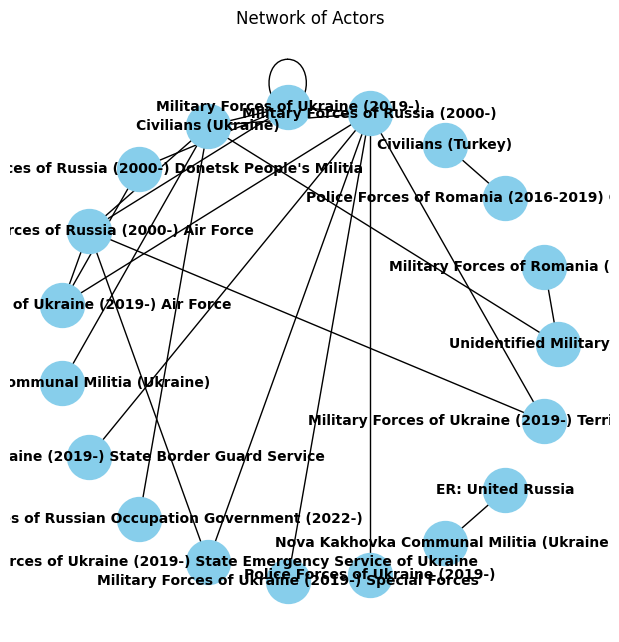

In [229]:
# Do a network analysis of the actors
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges
c = 0

battles = data[data['DISORDER_TYPE'] == 'Political violence']
for i, row in battles.iterrows():
    if row['ACTOR2'] is not np.nan:
        G.add_edge(row['ACTOR1'], row['ACTOR2'], weight=row['FATALITIES'])
    if c == 2000:
        break

    c+=1
        

# Draw the graph
plt.figure(figsize=(6, 6))
#pos = nx.spring_layout(G, seed=42)
#pos=nx.fruchterman_reingold_layout(G)
pos=nx.circular_layout(G)
#pos=nx.random_layout(G)
#pos=nx.spectral_layout(G)

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Network of Actors")
plt.show()



## 5. Visualizations

- Explain the visualizations you've chosen.

- Why are they right for the story you want to tell?

## Undirected network graph

In this graph, we wanted to show the parties that are responsible for the casualties in the dataset. When utilising undirected graphs we can nicely display the complicated relationships between the actors and get a quick overview into the interconnections between them. 

We decided to encode the number of casualties of the conflict between two actors as the thickness of the edge to again gain a better view into the most violent relationships. Lastly, the node colour is determined by the TOTAL number of casualties, where the node initiated the conflict. This way the most violent actors are easily identified.

Please note, that to make the graph more readable, we decided to only include the top 40 actors in terms of casualties. This way we can focus on the most important relationships and not get lost in the complexity of the graph.

In [216]:
# Create a DataFrame for interactions with sum of fatalities
edges = data.groupby(['ACTOR1', 'ACTOR2'])['FATALITIES'].sum().reset_index()

# Filter edges to only include those with fatalities above a certain threshold and select top 20
threshold_fatalities = edges['FATALITIES'].quantile(0.90)  # Adjust threshold as needed
filtered_edges = edges[edges['FATALITIES'] > threshold_fatalities].nlargest(40, 'FATALITIES')

# Create the graph with filtered data
G = nx.from_pandas_edgelist(filtered_edges, 'ACTOR1', 'ACTOR2', ['FATALITIES'])

# Add attributes to each node.
for n in G.nodes():
    G.nodes[n]['name'] = n
    G.nodes[n]['fatalities_caused'] = data[data['ACTOR1'] == n]['FATALITIES'].sum()


def draw_graph(G):
    # Position nodes using the spring layout algorithm
    pos = nx.spring_layout(G, seed=22)

    # Draw nodes and edges and show weights
    viz = nxa.draw_networkx(G, pos=pos, edge_color='black',
                            node_color="fatalities_caused",
                            #node_size='degree:Q',
                            cmap='viridis',
                            # change node border color
                            width='FATALITIES:Q',
                            node_tooltip=['name', 'fatalities_caused'])

    return viz

In [217]:

# Call the function to draw the graph
graph_viz = draw_graph(G)

graph_viz


alt.LayerChart(...)

## Bar chart and scatter plot

To start off the data story, we wanted to show the distribution of the number of events in the dataset. Both to give an idea of what type of events the dataset contains and to show which events show up the most often. Further we overlayed the number of fatalities on top of the bar chart as a scatter plot to show the relationship between the number of events and the number of fatalities. Each scatter point is also proportionally sized to the total number of fatalities, to make it easier to see the most violent events.

In [239]:
def event_type_and_fatalities(data):
    event_fatalities = data.groupby('EVENT_TYPE')['FATALITIES'].sum().reset_index()

    # Filter out the Violence Against Civilians event type
    event_fatalities = event_fatalities[event_fatalities['EVENT_TYPE'] != 'Violence against civilians']

    # Also, count the number of occurrences for each event type
    event_counts = data['EVENT_TYPE'].value_counts().reset_index()
    event_counts.columns = ['EVENT_TYPE', 'COUNT']

    # Merge both dataframes to have counts and fatalities side by side
    event_summary = pd.merge(event_fatalities, event_counts, on='EVENT_TYPE')

    # Create a bar chart for the number of events
    fig = go.Figure(go.Bar(
        x=event_summary['EVENT_TYPE'],
        y=event_summary['COUNT'],
        name='Number of Events',
        marker=dict(color='lightslategray'),
        # hoverinfo='skip'  # Hides hover info for the bars
        hovertemplate="<b>%{x}</b><br>Number of Events: %{y}<extra></extra>"  # Custom hover text for bars

    ))

    # Add a scatter plot on top of the bar chart for fatalities
    fig.add_trace(go.Scatter(
        x=event_summary['EVENT_TYPE'],
        y=event_summary['FATALITIES'],  # Use actual fatalities for positioning
        mode='markers+text',  # Display markers with text
        marker=dict(
            # size=20,  # Fixed size or scale appropriately
            # scale appropriatelyt
            size=np.log(event_summary['FATALITIES']) * 3,
            color='red'
        ),
        text=event_summary['FATALITIES'],  # Fatalities count as text
        textposition='top center',  # Position text above the markers
        name='Fatalities',
        hovertemplate="<b>%{x}</b><br>Total Fatalities: %{y}<extra></extra>"  # Custom hover text for points

    ))

    # Update the layout to add titles and axis labels
    fig.update_layout(
        title='Impact of Different Conflict Events',
        xaxis=dict(title='Event Type'),
        yaxis=dict(title='Number of Events/Fatalities',
                   range=[0, max(event_summary['COUNT'].max(), event_summary['FATALITIES'].max()) + 50]),
        legend_title='Data Type',
        barmode='overlay'  # Ensures bars and scatter points share the same x-axis
    )

    return fig


# Call the function to create the plot
fig = event_type_and_fatalities(data)

fig.show()


In [233]:
data["SUB_EVENT_TYPE"].unique()

array(['Disrupted weapons use', 'Remote explosive/landmine/IED',
       'Peaceful protest', 'Attack', 'Arrests', 'Armed clash',
       'Shelling/artillery/missile attack', 'Air/drone strike',
       'Change to group/activity', 'Abduction/forced disappearance',
       'Looting/property destruction', 'Other',
       'Non-state actor overtakes territory', 'Agreement', 'Grenade',
       'Headquarters or base established', 'Government regains territory',
       'Protest with intervention', 'Sexual violence', 'Suicide bomb',
       'Non-violent transfer of territory', 'Mob violence',
       'Excessive force against protesters', 'Violent demonstration'],
      dtype=object)

In [240]:
data[data["EVENT_TYPE"] == 'Violence against civilians']["SUB_EVENT_TYPE"].unique()

array(['Attack', 'Abduction/forced disappearance', 'Sexual violence'],
      dtype=object)

In [258]:
# Evolution of protests over time
def plot_protests_over_time(data):
    # Filter the data for protests
    protests = data[data['EVENT_TYPE'] == 'Protests']

    # Group by year and month to count occurrences
    date_counts = protests.groupby([protests['EVENT_DATE'].dt.to_period('M')]).size().reset_index(name='COUNT')
    date_counts['EVENT_DATE'] = date_counts['EVENT_DATE'].dt.to_timestamp()

    # Create a line plot
    fig = px.line(date_counts, x='EVENT_DATE', y='COUNT',
                  title='Trends in Protests over Time',
                  labels={'EVENT_DATE': 'Date', 'COUNT': 'Number of Protests'})

    return fig

In [259]:

# Call the function to plot protests over time
fig = plot_protests_over_time(data)

fig.show()

In [278]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], unit='s')

# Extract the hour from each timestamp
data['HOUR'] = data['TIMESTAMP'].dt.hour
data['DAY_OF_WEEK'] = data['TIMESTAMP'].dt.dayofweek

hourly_counts = data.groupby('HOUR').size().reset_index(name='COUNT')

# Group by the day of the week and count the number of events
weekly_counts = data.groupby('DAY_OF_WEEK').size().reset_index(name='COUNT')
# Optionally, sort by the day of the week if needed (not required if data is well formatted)
weekly_counts.sort_values('DAY_OF_WEEK', inplace=True)


# Assuming 'EVENT_TYPE' is a column in your data
hourly_type_counts = data.groupby(['HOUR', 'SUB_EVENT_TYPE']).size().unstack().fillna(0)
fig = px.imshow(hourly_type_counts,
                labels=dict(x="Hour of the Day", y="Event Type", color="Number of Events"),
                x=hourly_type_counts.columns,
                y=hourly_type_counts.index,
                title="Hourly Distribution of Event Types",
                color_continuous_scale=px.colors.sequential.Viridis)


fig.show()

In [270]:
heatmap_data = data.groupby(['DAY_OF_WEEK', 'HOUR']).size().unstack(fill_value=0)


In [275]:
# Create a complete index for every hour and day combination
multi_index = pd.MultiIndex.from_product([range(7), range(24)], names=['DAY_OF_WEEK', 'HOUR'])

# Group the data and unstack, reindex with the complete index to fill missing combinations with zeros
heatmap_data = data.groupby(['DAY_OF_WEEK', 'HOUR']).size().reindex(multi_index, fill_value=0).unstack(level=-1)


In [277]:
data['YEAR'] = data['TIMESTAMP'].dt.year
heatmap_data = data.groupby(['YEAR', 'HOUR']).size().unstack(fill_value=0)
import plotly.express as px

# Create the heatmap
fig = px.imshow(
    heatmap_data,
    labels={'x': "Year", 'y': "Hour of the Day", 'color': "Number of Events"},
    x=heatmap_data.columns,
    y=heatmap_data.index,
    title="Heatmap of Event Occurrences by Year and Hour",
    aspect="auto",
    color_continuous_scale='Viridis'
)

# Show the plot
fig.show()


In [281]:
import pandas as pd

# Convert TIMESTAMP to datetime if not already
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], unit='s')

# Calculate the minute of the day
data['MINUTE_OF_DAY'] = data['TIMESTAMP'].dt.hour * 60 + data['TIMESTAMP'].dt.minute


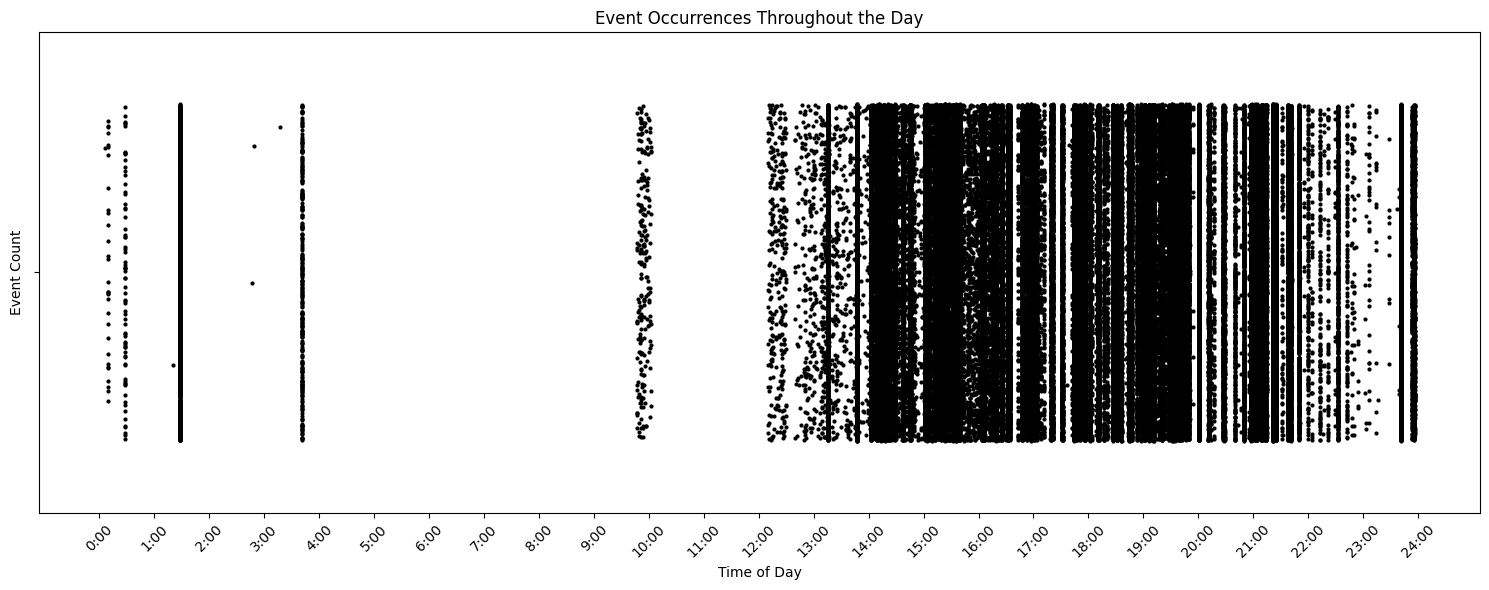

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot
plt.figure(figsize=(15, 6))
strip_plot = sns.stripplot(x='MINUTE_OF_DAY', data=data, jitter=0.35, color="black", size=3)  # Adjust jitter for better visibility

# Setting up the plot title and labels
plt.title('Event Occurrences Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Event Count')

# Set x-axis ticks to display hours
hour_ticks = range(0, 1441, 60)  # From minute 0 to 1440 (24 hours), step by 60 minutes
hour_labels = [f'{i}:00' for i in range(25)]  # Labels from '0:00' to '23:00'
plt.xticks(hour_ticks, hour_labels, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [380]:
# Total number of fatalities

total_fatalities = data['FATALITIES'].sum()
total_fatalities

refugees = 6500000

70164

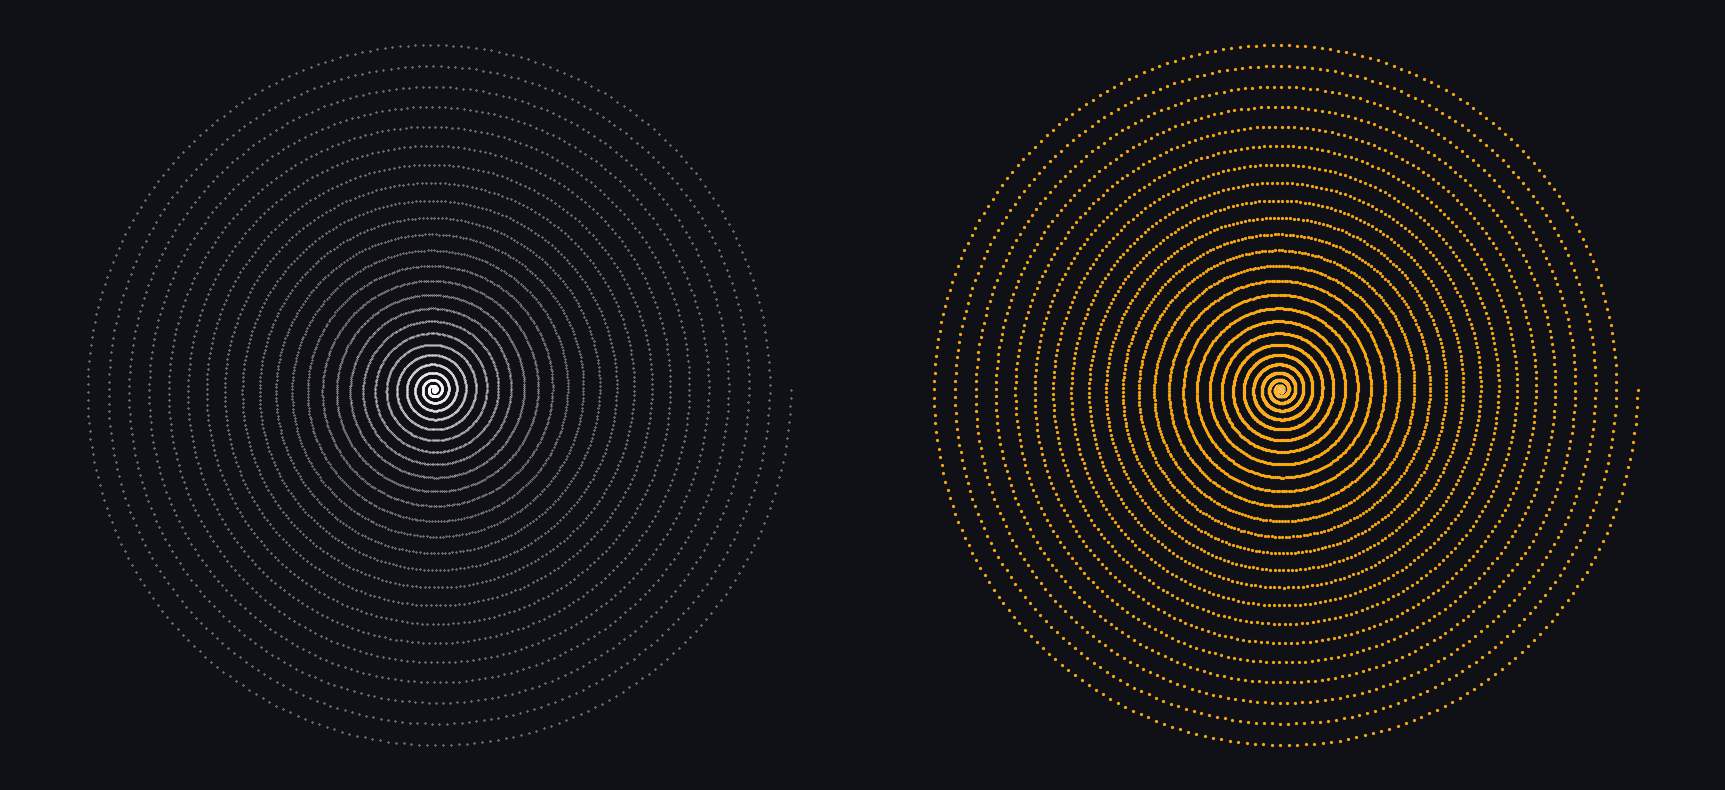

In [451]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points, rotations, max_radius):
    theta = np.linspace(0, rotations * np.pi, n_points)
    r = np.linspace(0, max_radius, n_points)**1.5  # The radius grows to make it more compact
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def plot_dual_spirals(n_points1, rotations1, max_radius1, n_points2, rotations2, max_radius2, offset):
    x1, y1 = generate_spiral(n_points1, rotations1, max_radius1)
    x2, y2 = generate_spiral(n_points2, rotations2, max_radius2)
    
    # Offset the second spiral
    x2 += offset

    plt.figure(figsize=(22, 10))  # Set the figure size
    plt.scatter(x1, y1, s=0.1, c="red", edgecolors="white")  # Plot first spiral
    plt.scatter(x2, y2, s=5, color='orange', marker="o", edgecolors="white", linewidths=0.05)  # Plot second spiral in red for contrast
    plt.axis('off')  # Turn off the axis
    plt.show()

# Parameters for each spiral
n_points1 = 7016
rotations1 = 50
max_radius1 = 40

n_points2 = 6500
rotations2 = 50
max_radius2 = 40
offset = 600 # Adjust this as needed to position the spirals next to each other

# Plotting the dual spirals
plot_dual_spirals(n_points1, rotations1, max_radius1, n_points2, rotations2, max_radius2, offset)
